<a href="https://colab.research.google.com/github/not-Bartek/Breast-Cancer-Classification-with-NN/blob/main/Deep_Learning_Breast_Cancer_Classification_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classification with a simple Neural Network (NN)**

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data collection & Preprocessing

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data_frame.shape

(569, 31)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Splitting the data into training & testing data

In [ ]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y)

Standarizing the data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

Building the neuron network

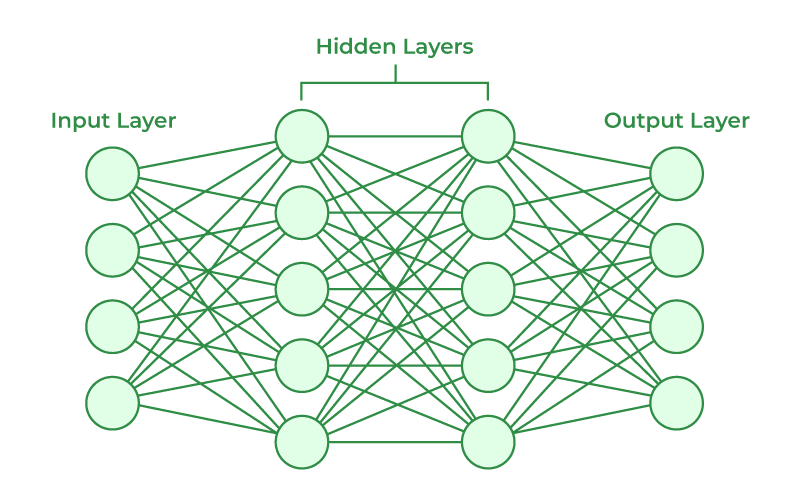

In [52]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [53]:
#setting up the layers

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])
#dense -> every neuron is linked to every other in the next and previous networks

In [54]:
#compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
#training the neural network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=25)

Epoch 1/25
13/13 [==============================] - 1s 16ms/step - loss: 0.7385 - accuracy: 0.5844 - val_loss: 0.5714 - val_accuracy: 0.7391
Epoch 2/25
13/13 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7824 - val_loss: 0.3834 - val_accuracy: 0.7826
Epoch 3/25
13/13 [==============================] - 0s 6ms/step - loss: 0.3411 - accuracy: 0.8704 - val_loss: 0.2858 - val_accuracy: 0.9130
Epoch 4/25
13/13 [==============================] - 0s 7ms/step - loss: 0.2686 - accuracy: 0.9022 - val_loss: 0.2347 - val_accuracy: 0.9565
Epoch 5/25
13/13 [==============================] - 0s 6ms/step - loss: 0.2261 - accuracy: 0.9315 - val_loss: 0.2039 - val_accuracy: 0.9565
Epoch 6/25
13/13 [==============================] - 0s 6ms/step - loss: 0.1981 - accuracy: 0.9364 - val_loss: 0.1825 - val_accuracy: 0.9565
Epoch 7/25
13/13 [==============================] - 0s 7ms/step - loss: 0.1765 - accuracy: 0.9487 - val_loss: 0.1680 - val_accuracy: 0.9565
Epoch 8/25
13/13 [=

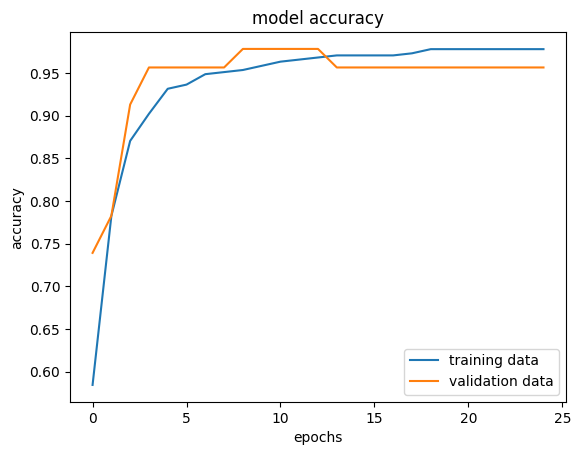

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

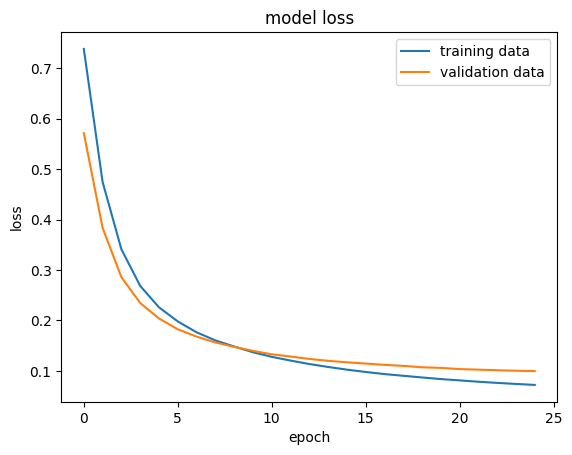

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')

Accuracy of the model on test data

In [58]:
loss, accuracy = model.evaluate(X_test_std, Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.9737


In [59]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[ 0.2846924  -0.67863618  0.3222688   0.06207881  1.39889858  1.44702973
  0.30524675  0.95818714  0.70530246  0.28173127  0.08307307 -0.26602311
 -0.03960311 -0.01404005  0.68685558  0.88470868 -0.02298882  1.7396915
  0.36385443  0.41573547 -0.03327419 -1.18729815 -0.04068111 -0.2069053
  0.30906844  0.19949664 -0.37609263  0.41982333 -0.47765455 -0.34420117]


In [60]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 4ms/step


In [61]:
print(Y_pred.shape)

(114, 2)


In [62]:
print(Y_pred[0])

[0.6917894 0.5228044]


In [63]:
print(Y_pred)

[[6.91789389e-01 5.22804379e-01]
 [5.20374030e-02 9.51820076e-01]
 [9.91641104e-01 2.74918582e-02]
 [9.95534193e-03 9.96004403e-01]
 [4.88836430e-02 9.80197787e-01]
 [3.80252928e-01 7.08055615e-01]
 [1.91013053e-01 8.44556749e-01]
 [1.69383809e-01 9.36432719e-01]
 [6.19158030e-01 6.84792757e-01]
 [9.80485752e-02 9.26840246e-01]
 [9.96273756e-01 8.04214552e-03]
 [5.62263392e-02 9.94429529e-01]
 [2.01434746e-01 8.72129560e-01]
 [1.34634271e-01 9.51773942e-01]
 [3.42640728e-02 9.89303410e-01]
 [6.96820736e-01 4.18552041e-01]
 [9.28602695e-01 1.01417542e-01]
 [9.02230918e-01 1.95599914e-01]
 [7.33060762e-02 9.47462440e-01]
 [9.99849796e-01 3.37770069e-03]
 [1.38106406e-01 8.60499978e-01]
 [9.99875367e-01 7.74828193e-04]
 [7.42761791e-02 8.71966004e-01]
 [1.03513665e-01 8.90324771e-01]
 [8.87448549e-01 2.30583310e-01]
 [3.75618227e-02 9.73297596e-01]
 [1.40381288e-02 9.84471619e-01]
 [9.96011138e-01 1.61853470e-02]
 [7.40823373e-02 9.91202533e-01]
 [1.39086425e-01 8.93651068e-01]
 [3.616971

model.predict() gives the prediction probability of each class for that data point

In [64]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

Building the prediction system

In [76]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
)
#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standarizing the data
input_standardized = scaler.transform(input_data_reshaped)
prediction = model.predict(input_standardized)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print('The tumor is malignant')
else:
  print('The tumor is benign')

1/1 [==============================] - 0s 31ms/step
[[0.9965063  0.02160778]]
[0]
The tumor is malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
